In [1]:

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install spacy
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.5MB/s 
     |████████████████████████████████| 552kB 40.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=b51e99c99ae62e833ba2dcbf9e2d6d232edb3d24bd55c3baf690e529e44c54bb
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=62bfe44ce39ee2321030549069c88f2f0ba61252afde65c8a04af1ec99446866
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Thesis/python code/nature&parks/nature&parks.csv', error_bad_lines=False);
data.head(5)
print(data.shape)

(11489, 13)


In [5]:

from nltk import FreqDist
import seaborn as sns

def freq_words(x, terms = 30):
  
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


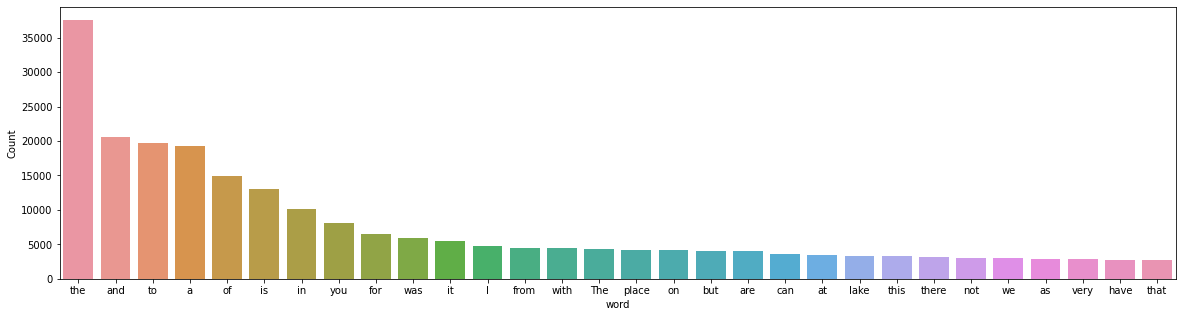

In [6]:
freq_words(data['Review'])

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# NLTK Stop words
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# stop_words.extend(['phewa', 'kathmandu', 'pokhara','sarangkot','nepal','place','lake', 'bit','sit','etc.','go','be','able','little','lot','garden','phewa','fewa',
#                    'thamel','restaurant','cave','day','river','time','water','fall','city','peaceful','city','busy','cafe','car','hotel','ktm','earth',
#                    'lakeside','waterfall','tal','island','inside','look','minute','minutes','coffee','read','definitely','lots','lot','side','sides','point','devis','thing'
#                    ,'view','visit','people','day','days','hour','hours','end','things','bat','bats','cave','caves','life',
#                    'area','areas','friends','spot','sopts','view','day','night','nights','walk'
#                    ,'part','parts','step','steps','top','view','lunch','evening','morning',
#                    'attraction','view','exit','devi','views','dream'
#                    ,'photo','waterfall','boating','food','row'])



from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['phewa', 'kathmandu', 'pokhara','sarangkot','nepal','place','lake', 'bit','sit','etc.','go','be','able','little','lot','garden','phewa','fewa',
                   'thamel','restaurant','restaurants','cave','day','river','time','water','fall','city','peaceful','city','busy','cafe','car','hotel','ktm','earth',
                   'lakeside','waterfall','tal','island','inside','look','minute','minutes','coffee','read','definitely','lots','lot','side','sides','point','devis','thing'
                   ,'view','visit','people','day','days','hour','hours','end','things','bat','bats','cave','caves','life',
                   'area','areas','friends','spot','spots','view','day','night','nights','walk'
                   ,'part','parts','step','steps','top','view','lunch','evening','morning',
                   'attraction','view','exit','devi','views','dream'
                   ,'photo','photos','waterfall','boating','food','row',
                   'book','books','village','experience','tea','site','sites','tunnel','tourist',
                   'waterfall','waterfalls','love','tourist','grass',
                   'temple','place','places','afternoon','sunset','sunrise','group','groups'
                   ,'years','tourists','bus',
                   'road','taxi','fish','nature',
                   'dream','couple','couples','monsoon','flower','relax',
                   'driver','flowers','flower','local','locals'
                   ,'light','lights','season','enjoy','bar','bars','family','garden','fall'
                   ,'shop','beauty','weather','garden','rock','rocks','shops','shop',
                   'life','section','sections','style','styles'
                   ,'trekker','town','boat','boating','cloud','mountain','mountains'
                  #  ,'option','options','house','person','persons','drink'
                   ])


# stop_words.extend(['phewa', 'kathmandu', 'pokhara','sarangkot','nepal','place','lake', 'bit','sit','etc.','go','be','able','little','lot','garden','phewa','fewa',
#                    'thamel','restaurant','restaurants','cave','day','river','time','water','fall','city','peaceful','city','busy','cafe','car','hotel','ktm','earth',
#                    'lakeside','waterfall','tal','island','inside','look','minute','minutes','coffee','read','definitely','lots','lot','side','sides','point','devis','thing'
#                    ,'view','visit','people','day','days','hour','hours','end','things','bat','bats','cave','caves','life',
#                    'area','areas','friends','spot','spots','view','day','night','nights','walk'
#                    ,'part','parts','step','steps','top','view','lunch','evening','morning',
#                    'attraction','view','exit','devi','views','dream'
#                    ])

In [0]:
df=data

In [10]:
df.head()

,Name,Reviewer,Review Title,Review,Rating,Helpful Vote,RatingMonth,RatingYear,ExpMonth,ExpYear,City,Country,Attraction_Location
0,Bat Cave,nepaltrekhub,Good but not impressive,I have been here many times here while i was i...,5,0,January,2020,June,2019.0,Kathmandu,Nepal,Pokhara
1,Bat Cave,enigmatic1989,One of a kind man v/s wild experience!!,These caves located at a 30 minute drive from ...,4,0,January,2020,January,2020.0,National Capital Territory of Delhi,India,Pokhara
2,Bat Cave,Emilie0410,Amazing bats - awful tourists..,The cave in itself is a short trip worth to do...,2,0,November,2019,November,2019.0,Brussels,Belgium,Pokhara
3,Bat Cave,AndyDavies73,DO NOT GO HERE,DO NOT GO HERE. It is ab absolute waste of ti...,1,0,November,2019,November,2019.0,Leongatha,Australia,Pokhara
4,Bat Cave,819nicoh,Not worth the trip,Cave is rather small with 2 entrances on both ...,2,0,November,2019,November,2019.0,Montabaur,Germany,Pokhara


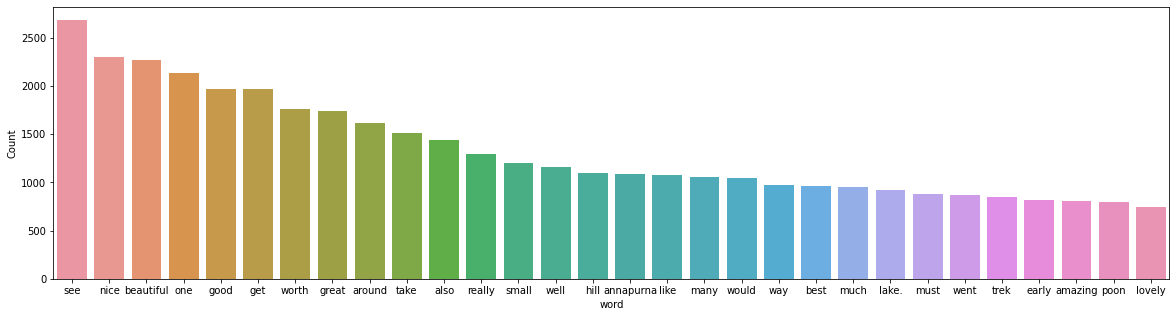

In [11]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    
    return rev_new

# remove short words (length < 3)
df['Review'] = df['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

df['Review'] = [r.lower() for r in df['Review']]
# remove stopwords from the text
df['Review'] = [remove_stopwords(r.split()) for r in df['Review']]

freq_words(data['Review'])

In [12]:
# Convert to list

df["concatenated_review"] = df['Review Title'] +" " + df['Review']
data =df['concatenated_review'].values.tolist()
data_review=df['Review']
# # Remove Emails
# data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# # Remove new line characters
# data = [re.sub('\s+', ' ', sent) for sent in data]

# # Remove distracting single quotes
# data = [re.sub("\'", "", sent) for sent in data]

print(data)
# pprint(data[:1])

Output hidden; open in https://colab.research.google.com to view.

In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['good', 'but', 'not', 'impressive', 'many', 'times', 'quite', 'interesting', 'see', 'quite', 'smelly', 'like', 'location', 'spent', 'quite', 'good', 'here']]


In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['good', 'but', 'not', 'impressive', 'many', 'times', 'quite', 'interesting', 'see', 'quite', 'smelly', 'like', 'location', 'spent', 'quite', 'good', 'here']


In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word.lower() not in stop_words] for doc in texts]

def remove_numbers(texts):
  return [[word for word in simple_preprocess(str(doc)) if not word.isnumeric()] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def remove_words_with2characters(texts):
  return [[word for word in simple_preprocess(str(doc)) if len(word)>3] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):

    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# data_words_nostops=remove_words_with2characters(data_words_nostops)
data_words_nostops=remove_numbers(data_words_nostops)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])

print(data_lemmatized[:1])

[['time', 'location']]


In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=5, no_above=0.9)
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [0]:
id2word[0]

'location'

In [0]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('location', 1), ('time', 1)]]

In [0]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

import os.path
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this o

In [0]:
new_model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, optimize_interval=10,iterations=2000,id2word=id2word)

pprint(new_model.print_topics())

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=new_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[(0,
  '0.022*"trip" + 0.019*"guide" + 0.017*"climb" + 0.016*"cloud" + 0.015*"hike" '
  '+ 0.014*"peak" + 0.012*"range" + 0.010*"stair" + 0.010*"trail" + '
  '0.010*"hill"'),
 (1,
  '0.053*"ride" + 0.029*"boat" + 0.024*"trip" + 0.022*"cable" + '
  '0.015*"activity" + 0.014*"hill" + 0.011*"fun" + 0.011*"rent" + '
  '0.010*"paddle" + 0.010*"paragliding"'),
 (2,
  '0.029*"oasis" + 0.028*"peace" + 0.026*"dream" + 0.024*"street" + '
  '0.020*"garden" + 0.016*"noise" + 0.015*"chaos" + 0.015*"traffic" + '
  '0.014*"escape" + 0.012*"rupee"'),
 (3,
  '0.021*"entrance" + 0.014*"ticket" + 0.012*"park" + 0.010*"fall" + '
  '0.010*"pay" + 0.009*"entry" + 0.009*"guide" + 0.009*"money" + 0.008*"rupee" '
  '+ 0.008*"stair"')]

Coherence Score:  0.39560977472043424


In [0]:
def mallet_to_lda(mallet_model):
    model_gensim = gensim.models.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0, iterations=2000,
        gamma_threshold=0.001,
        dtype=np.float32
    )
    model_gensim.sync_state()
    model_gensim.state.sstats = mallet_model.wordtopics
    return model_gensim

lda_model=mallet_to_lda(new_model)
pprint(lda_model.print_topics(20))

[(0,
  '0.022*"trip" + 0.019*"guide" + 0.017*"climb" + 0.016*"cloud" + 0.015*"hike" '
  '+ 0.014*"peak" + 0.012*"range" + 0.010*"stair" + 0.010*"trail" + '
  '0.010*"hill"'),
 (1,
  '0.053*"ride" + 0.029*"boat" + 0.024*"trip" + 0.022*"cable" + '
  '0.015*"activity" + 0.014*"hill" + 0.011*"fun" + 0.011*"rent" + '
  '0.010*"paddle" + 0.010*"paragliding"'),
 (2,
  '0.029*"oasis" + 0.028*"peace" + 0.026*"dream" + 0.024*"street" + '
  '0.020*"garden" + 0.016*"noise" + 0.015*"chaos" + 0.015*"traffic" + '
  '0.014*"escape" + 0.012*"rupee"'),
 (3,
  '0.021*"entrance" + 0.014*"ticket" + 0.012*"park" + 0.010*"fall" + '
  '0.010*"pay" + 0.009*"entry" + 0.009*"guide" + 0.009*"money" + 0.008*"rupee" '
  '+ 0.008*"stair"')]


In [0]:
pprint(lda_model.print_topics(num_topics=-1,num_words=100))

In [0]:
lda_model.save('/content/drive/My Drive/Thesis/python code/nature&parks/model.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [18]:
lda_model=gensim.models.LdaModel.load('/content/drive/My Drive/Thesis/python code/nature&parks/model.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39560977472043424


In [0]:
pprint(lda_model.print_topics())

[(0,
  '0.022*"trip" + 0.019*"guide" + 0.017*"climb" + 0.016*"cloud" + 0.015*"hike" '
  '+ 0.014*"peak" + 0.012*"range" + 0.010*"stair" + 0.010*"trail" + '
  '0.010*"hill"'),
 (1,
  '0.053*"ride" + 0.029*"boat" + 0.024*"trip" + 0.022*"cable" + '
  '0.015*"activity" + 0.014*"hill" + 0.011*"fun" + 0.011*"rent" + '
  '0.010*"paddle" + 0.010*"paragliding"'),
 (2,
  '0.029*"oasis" + 0.028*"peace" + 0.026*"dream" + 0.024*"street" + '
  '0.020*"garden" + 0.016*"noise" + 0.015*"chaos" + 0.015*"traffic" + '
  '0.014*"escape" + 0.012*"rupee"'),
 (3,
  '0.021*"entrance" + 0.014*"ticket" + 0.012*"park" + 0.010*"fall" + '
  '0.010*"pay" + 0.009*"entry" + 0.009*"guide" + 0.009*"money" + 0.008*"rupee" '
  '+ 0.008*"stair"')]


In [0]:

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=new_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4193,"oasis, peace, dream, street, garden, noise, ch...",Good but not impressive many times quite inter...
1,1,3.0,0.8000,"entrance, ticket, park, fall, pay, entry, guid...",One of a kind man v/s wild experience!! locate...
2,2,3.0,0.5349,"entrance, ticket, park, fall, pay, entry, guid...",Amazing bats - awful tourists.. short trip wor...
3,3,3.0,0.6966,"entrance, ticket, park, fall, pay, entry, guid...",DO NOT GO HERE here. absolute waste money need...
4,4,2.0,0.3410,"oasis, peace, dream, street, garden, noise, ch...",Not worth the trip rather small entrances side...
5,5,3.0,0.7838,"entrance, ticket, park, fall, pay, entry, guid...",No need to go went hired near gurkha museum. w...
6,6,3.0,0.4194,"entrance, ticket, park, fall, pay, entry, guid...",Dangerous please don't go here. since returni...
7,7,1.0,0.5444,"ride, boat, trip, cable, activity, hill, fun, ...",Nice Little Side Trip nice necessarily whole s...
8,8,0.0,0.4461,"trip, guide, climb, cloud, hike, peak, range, ...",Great Cave great get far enough. extremely sma...
9,9,0.0,0.5836,"trip, guide, climb, cloud, hike, peak, range, ...",Best adventures place in Pokhara best adventur...


In [0]:
from google.colab import files

df_dominant_topic.to_csv('NatureTopicAssignment.csv')
files.download('NatureTopicAssignment.csv')


In [0]:
df_topic_distribution = df_dominant_topic['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2.0,4021
1,0.0,2968
2,1.0,2726
3,3.0,1774


In [0]:
from google.colab import files

df_topic_distribution.to_csv('Mostdominanttopics.csv')
files.download('Mostdominanttopics.csv')


In [0]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9758,"trip, guide, climb, cloud, hike, peak, range, stair, trail, hill",Fantastic for all first time trekkers or otherwise poon hill made trip annapurna base camp. sli...
1,1.0,0.9626,"ride, boat, trip, cable, activity, hill, fun, rent, paddle, paragliding",One of best attraction in Pokhara beautiful lake go for all day boat riding no need for drive...
2,2.0,0.9520,"oasis, peace, dream, street, garden, noise, chaos, traffic, escape, rupee",An Oasis of Calm main street outskirts (almost opposite famed fire ice) one could easily miss wa...
3,3.0,0.9473,"entrance, ticket, park, fall, pay, entry, guide, money, rupee, stair",The longest cave of Nepal visited underground long back ago. sacred hindus popular attraction. u...


In [0]:
from google.colab import files

sent_topics_sorteddf_mallet.to_csv('most_representative_docs.csv')
files.download('most_representative_docs.csv')

In [0]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
print(sent_topics_sorteddf_mallet.head())

topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

   Topic_Num  ...                                                                                                 Text
0        0.0  ...  Fantastic for all  first time trekkers or otherwise poon hill made trip annapurna base camp. sli...
1        1.0  ...  One of best attraction in Pokhara  beautiful lake  go for all day boat riding  no need for drive...
2        2.0  ...  An Oasis of Calm main street outskirts (almost opposite famed fire ice) one could easily miss wa...
3        3.0  ...  The longest cave of Nepal visited underground long back ago. sacred hindus popular attraction. u...

[4 rows x 4 columns]


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,2.0,"oasis, peace, dream, street, garden, noise, chaos, traffic, escape, rupee",2968.0,0.2583
1.0,3.0,"entrance, ticket, park, fall, pay, entry, guide, money, rupee, stair",2726.0,0.2373
2.0,3.0,"entrance, ticket, park, fall, pay, entry, guide, money, rupee, stair",4021.0,0.3500
3.0,3.0,"entrance, ticket, park, fall, pay, entry, guide, money, rupee, stair",1774.0,0.1544
4.0,2.0,"oasis, peace, dream, street, garden, noise, chaos, traffic, escape, rupee",NaN,NaN
...,...,...,...,...
11484.0,2.0,"oasis, peace, dream, street, garden, noise, chaos, traffic, escape, rupee",NaN,NaN
11485.0,0.0,"trip, guide, climb, cloud, hike, peak, range, stair, trail, hill",NaN,NaN
11486.0,3.0,"entrance, ticket, park, fall, pay, entry, guide, money, rupee, stair",NaN,NaN
11487.0,2.0,"oasis, peace, dream, street, garden, noise, chaos, traffic, escape, rupee",NaN,NaN


In [0]:

doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(8,4), dpi=100)
plt.hist(doc_lens, bins = 1000, color='red')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 20), ylabel='Number of Reviews (Nature & Parks)', xlabel='Review-Word Count')
plt.tick_params(size=8)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Review Word Counts', fontdict=dict(size=9))
plt.show()

TypeError: ignored

TypeError: ignored

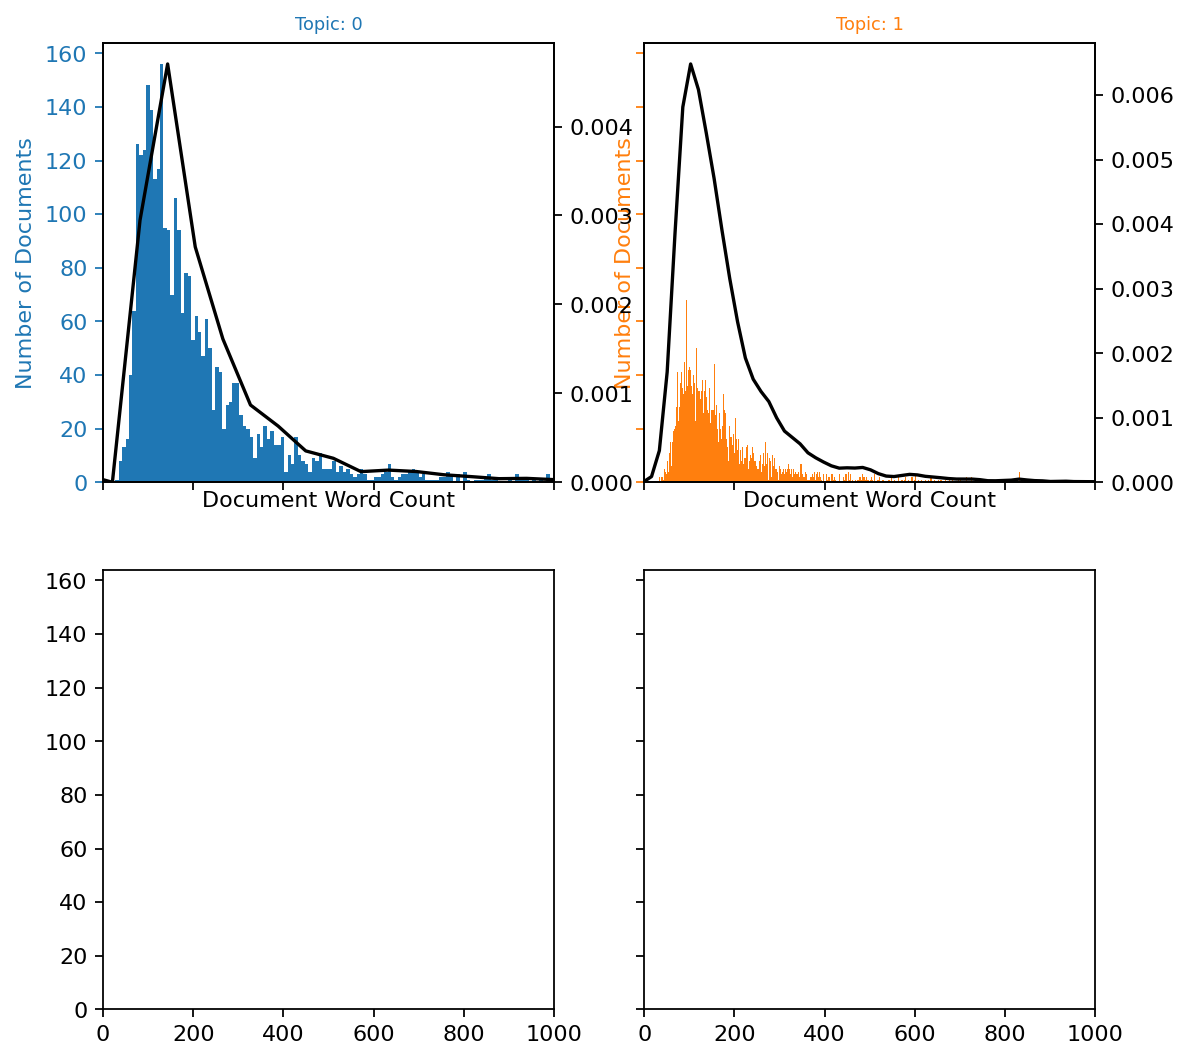

In [0]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(8,8), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=8, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=8)
plt.show()

In [0]:

# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,num_words=50)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.5, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.1, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 8000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

In [0]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs= model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [0]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x+1)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 10000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
ax2.set_ylabel('Number of Documents')
ax2.set_ylim(0, 10000)

plt.show()

In [0]:
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]
print(topic_top3words)


df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(','.join)
df_top3words.reset_index(level=0,inplace=True)



df_onlytopics=df_top3words["words"]

df_onlytopics=np.array(df_onlytopics)

print(df_onlytopics)

In [0]:
lda_keys=df_dominant_topic["Dominant_Topic"]
lda_keys=list(lda_keys)

In [0]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    count=0
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        print(articles_in_that_topic)
        for i in range(len(keys)):
            
            if keys[i] == t:
                count=count+1
                # articles_in_that_topic.append(two_dim_vectors[i]) 
                articles_in_that_topic=two_dim_vectors[i]
                
        
        # articles_in_that_topic = np.vstack(articles_in_that_topic)
        print(articles_in_that_topic)
        # mean_article_in_that_topic = np.median(articles_in_that_topic, axis=0)
        mean_article_in_that_topic = articles_in_that_topic
        mean_topic_vectors.append(mean_article_in_that_topic)
        print(count)
    return mean_topic_vectors


n_topics=4
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda)
print(lda_mean_topic_vectors )


In [0]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(new_model[corpus]):
    topic_weights.append([w for i, w in row_list])


# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values


# num_topics=4
# # n-1 rows each is a vector with i-1 posisitons, where n the number of documents 
# # i the topic number and tmp[i] = probability of topic i
# topic_weights = []
# for row_list in lda_model[corpus]:
#   tmp = np.zeros(num_topics)
#   for i, w in row_list: 
#     tmp[i] = w
#     topic_weights.append(tmp)
# arr = pd.DataFrame(topic_weights).fillna(0).values


# Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 6
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)

In [0]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4

colormap = np.array([
    "#1EF6B0", "#DCF314", "#17F9F1","#FC7272","#BBC0EC","#FF66B2"])

colormap2=np.array(["#446D5F","#909A40","#67A9A7","#8D2323","#464C85","#CC0066"])
colormap = colormap[:n_topics]
colormap2 = colormap2[:n_topics]

mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics(Nature & parks)".format(n_topics), 
              plot_width=900, plot_height=700,)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=colormap[topic_num])


for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],  text=df_onlytopics[t],text_color=colormap2[t])
    plot.add_layout(label)


show(plot)

In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word,sort_topics=False)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.185594 -0.045742       1        1  28.214586
1     -0.055320 -0.181130       2        1  26.500957
2      0.295423 -0.017555       3        1  32.390915
3     -0.054509  0.244427       4        1  12.893544, topic_info=         Term        Freq       Total Category  logprob  loglift
417      ride  858.000000  858.000000  Default  30.0000  30.0000
905     oasis  582.000000  582.000000  Default  29.0000  29.0000
1672     boat  470.000000  470.000000  Default  28.0000  28.0000
814     dream  509.000000  509.000000  Default  27.0000  27.0000
490    street  468.000000  468.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
43       path   50.691153  216.916234   Topic4  -5.0486   0.5947
39    visitor   48.518675  184.685538   Topic4  -5.0924   0.7117
148      cost   45.622038  215.928307   Topic4  -5.1539   0.4939
121     price   47.070356  371.617797   Topic4  -5.1227  -0.0178
125    ground   41.277082  158.606760   Topic4  -5.2540   0.7023

[366 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1335      1  0.995451  accommodation
427       1  0.035631       activity
427       2  0.954130       activity
427       3  0.007918       activity
377       1  0.997996        advance
...     ...       ...            ...
157       1  0.491252           year
157       2  0.119091           year
157       3  0.029773           year
157       4  0.364717           year
1551      2  0.998154            zip

[569 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [0]:
pyLDAvis.save_html(vis,'/content/drive/My Drive/Thesis/python code/nature&parks/vis.html')

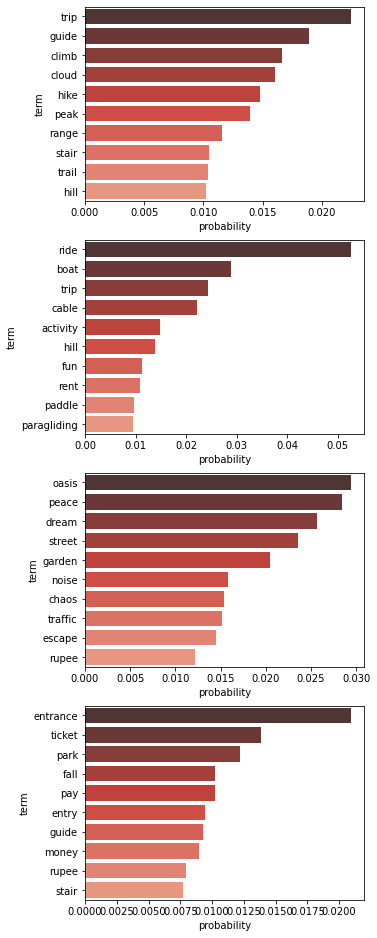

In [23]:
fiz=plt.figure(figsize=(5,25))
for i in range(4):
    df=pd.DataFrame(lda_model.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(6,1,i+1)
    # plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()